<a href="https://colab.research.google.com/github/deelilah/Predict-number-of-Upvotes-/blob/master/AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#upload the datasets path defination
root_path ='/content/drive'
train_path='/content/drive/My Drive/AV/train_NIR5Yl1.csv'
test_path='/content/drive/My Drive/AV/test_8i3B3FC.csv'
sub_path='/content/drive/My Drive/AV/sample_submission_OR5kZa5.csv'

In [ ]:
train=pd.read_csv(train_path)
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [ ]:
test=pd.read_csv(test_path)
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [ ]:
#data exploration
train.shape

(330045, 7)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [ ]:
#convert datatypes
train.Username = train.Username.astype("object")
train.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username       object
Views         float64
Upvotes       float64
dtype: object

In [ ]:
train.ID=train.ID.astype('object')
train.dtypes

ID             object
Tag            object
Reputation    float64
Answers       float64
Username       object
Views         float64
Upvotes       float64
dtype: object

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

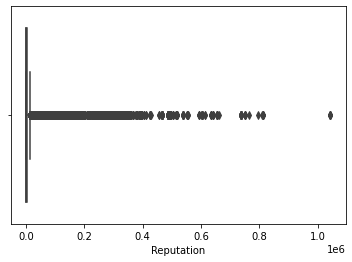

In [ ]:
#outliers
sns.boxplot(x=train['Reputation'])

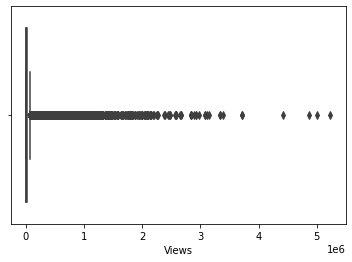

In [ ]:
sns.boxplot(x=train['Views'])

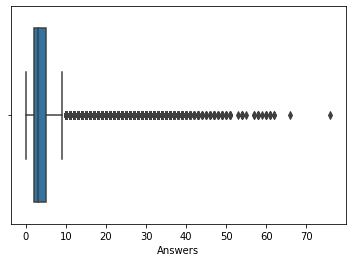

In [ ]:

sns.boxplot(x=train['Answers'])

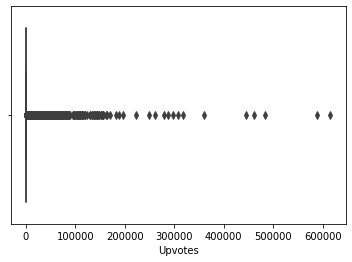

In [ ]:
sns.boxplot(x=train['Upvotes'])


In [ ]:
#look at our target variable
train["Upvotes"].unique()

array([4.2000e+01, 1.1750e+03, 6.0000e+01, ..., 3.3900e+03, 3.9280e+03,
       4.5611e+04])

In [ ]:
#drop unecessary columns
train.drop(columns=["ID",'Username'],inplace=True)
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


In [ ]:
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


DATA VISUALIZATIONS

In [ ]:
# train_df=train.groupby('Tag').mean()
# train_df.head(10)

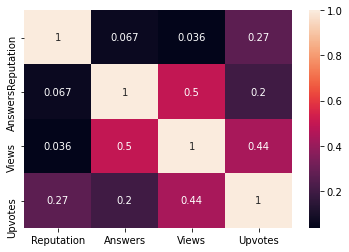

In [ ]:
Var_Corr = train.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Views and Upvotes have a high correlation of 0.98

In [ ]:
# Plotting distribution of numerical variables
fig, ax = plt.subplots(len(num_cols), figsize=(10,40))

for i, col_val in enumerate(num_cols):

    sns.distplot(train[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show()

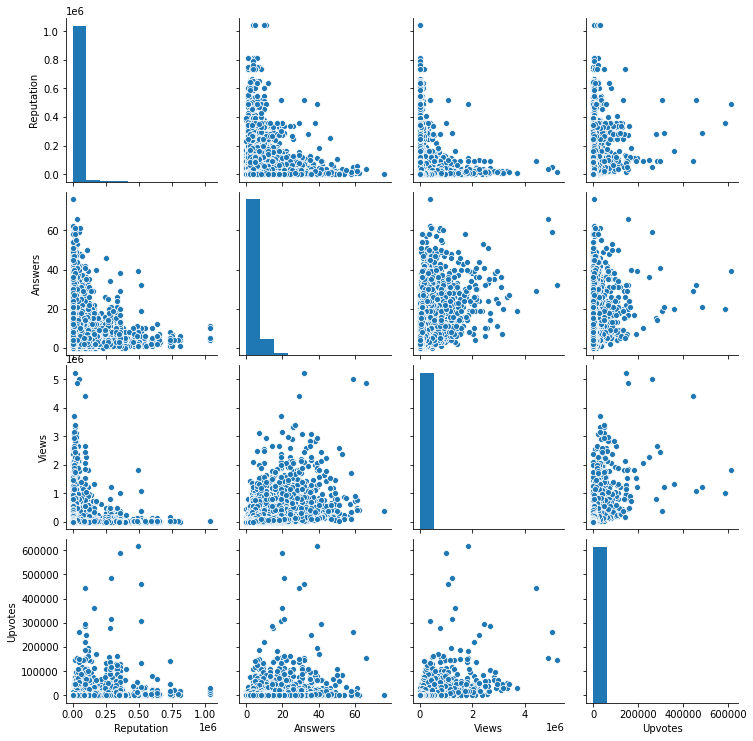

In [ ]:
sns.pairplot(train)

In [ ]:
# #univariate for th Reputation
# plt.figure(figsize = (9,5))
# train['Reputation'].plot(kind='bar')

In [ ]:
# #univariate for th Reputation
# plt.figure(figsize = (9,5))
# train['Answers'].plot(kind='bar')

In [ ]:
train['Answers'].unique()

array([ 2., 12.,  4.,  3.,  1.,  7.,  8.,  0.,  5., 13.,  9., 22., 10.,
        6., 11., 41., 16., 17., 25., 19., 21., 15., 20., 14., 18., 30.,
       34., 37., 33., 24., 26., 28., 29., 31., 27., 23., 32., 39., 49.,
       35., 38., 36., 50., 43., 47., 61., 51., 57., 40., 54., 46., 62.,
       48., 60., 53., 59., 42., 45., 76., 66., 44., 58., 55.])

In [ ]:
# #univariate for th Reputation
# plt.figure(figsize = (9,5))
# train['Views'].plot(kind='bar')

In [ ]:
train_df.plot.bar(stacked=True)


NameError: ignored

In [ ]:
train_df.plot.area()


In [ ]:
#label encode
train_df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Tag']=le.fit_transform(train['Tag'])
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y=train.Upvotes
x=train.drop('Upvotes',axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly_reg=PolynomialFeatures(degree=4,interaction_only=False,include_bias=True)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_train,y_train)
linear=linear_model.LassoLars(alpha=0.021,max_iter=150)
linear.fit(x_poly,y_train)

LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=150, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [ ]:
from sklearn.metrics import r2_score
pred=poly_reg.fit_transform(x_test)
pred_val=linear.predict(pred)
print(r2_score(y_test,pred_val))

0.9048339626095765
